## Klassifiering
I koden nedan så läser jag in data från csv. Skapar två variabler med k och m värde. Jag skapar två kolumner eller "rows" och döper dessa till x och y. Jag väljer sedan att skapa variabler och ge dessa värdet för de andra linjerna jag ska implementera. Jag kollar positioneringen på punkten till respektive linje och returnerar samt klassifierar från 0-4. Jag skriver sedan till csv-filen och lägger till en ny "row" som heter "Position" där vilken klass punkterna har, alltså 0-4.

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df = pd.read_csv(r"C:\Code\Python-programmering-Tobias-ObergAI24\Labs\Labs\unlabelled_data.csv", header= None) 

k = 0.78
m = -0.01


df.columns = ["x", "y"] 

def classify_points(row):             
    y_line = k * row["x"] + m
    y_line2 = -0.489 * row["x"] + 0 
    y_line3 = -2 * row["x"] + 0.16 
    y_line4 = 800 * row["x"] + -120 
    
    if row["y"] < y_line:
        return 0
    elif row["y"] < y_line2:
        return 1
    elif row["y"] < y_line3:
        return 2
    elif row["y"] < y_line4:
        return 3
    else:
        return 4

df["Position"] = df.apply(classify_points, axis=1)




## Scatter and plot
Jag skapar en funktion samt variabler med de nya värden för respektive linje som ska plottas. Jag loopar sedan igenom varje "row" i csv och scatterar datapointsen med respektive klass och färg som jag har tilldelat de olika klasserna. Jag tilldelar värden för y-axeln och x-axeln. Jag plottar ut alla linjer och ger dessa en unik färg samt label. Jag plottar ut titel samt text så att plotten blir tydligare, detsamma gäller med "legend".

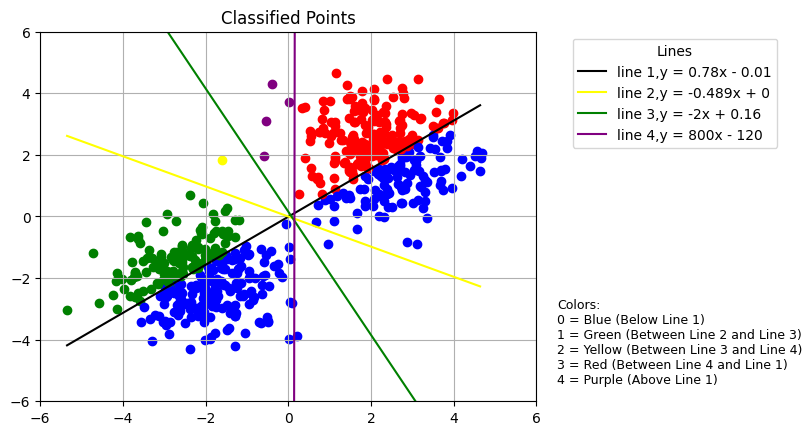

In [7]:
def scatter():                                                      
    data_x = np.linspace(df["x"].min(), df["y"].max(), 100)      
    data_y = 0.78 * data_x + -0.01                            
    data_f = -0.489 * data_x + 0
    data_g = -2 * data_x + 0.16
    data_h = 800 * data_x - 120
    
    for index, row in df.iterrows():
        color = {0: "blue", 1: "green", 2: "yellow", 3: "red", 4: "purple"}[row["Position"]] 
        plt.scatter(row["x"], row["y"], color = color)
    

    plt.ylim(-6.0,6.0)
    plt.xlim(-6.0,6.0)
    plt.plot(data_x, data_y, color= "black", label= "line 1," "y = 0.78x - 0.01")                  
    plt.plot(data_x, data_f, color = "yellow", label = "line 2," "y = -0.489x + 0")
    plt.plot(data_x, data_g, color = "green", label = "line 3," "y = -2x + 0.16")
    plt.plot(data_x, data_h, color = "purple", label = "line 4," "y = 800x - 120")

    plt.title("Classified Points")
    plt.text(6.5,-5.5, "Colors:\n0 = Blue (Below Line 1)\n1 = Green (Between Line 2 and Line 3)\n" 
             "2 = Yellow (Between Line 3 and Line 4)\n3 = Red (Between Line 4 and Line 1)\n"                   
             "4 = Purple (Above Line 1)", fontsize=9, color="black", verticalalignment="bottom")                       
    plt.grid()
    plt.legend(loc = "upper right",bbox_to_anchor=(1.5, 1), title = "Lines")
    plt.show()
    
scatter()

## Resonering
De blir skillnad med dessa linjer för att punkterna delas upp i olika "regioner" där linjerna fungerar som avgränsningar. I förhållande till vart punkten befinner sig så får den en ny klassifiering. Linjerna påverkar olika mycket eftersom k och m-värden skiljer sig. Detta leder då till att mängden punkter "fångas in" olika. Linje 4 fångar in få punkter medans linje 1 fångar in många fler. 

När det gäller att föredra någon linje över en annan så är det svårt att veta då syftet med klassifieringen är oklart. Det beror också på vad man letar efter. Om man vill hitta fler linjer så behöver man veta användningsområdet och även då veta hur specifik datan ska vara. I denna labb så finns det 4 stycken linjer. I teorin så antar jag att man kan hitta exakt så många linjer som man vill men som sagt så beror det på vad man vill åstadkomma med denna linjära klassifieringen. 
